 # Convolutional Neural Network (CNN)

Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in `image recognition and processing`. When discussing CNNs, several key terms and concepts come into play:

- **Convolutional Layer:** This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.

- **Convolutional Operation** This operation involves a kernel (or filter) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently focused on. The result is a single value in the output feature map.

In [1]:
# import necessary liberaries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Applying CNN on MNIST dataset    

In [2]:
# Load MNIST dataset using keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

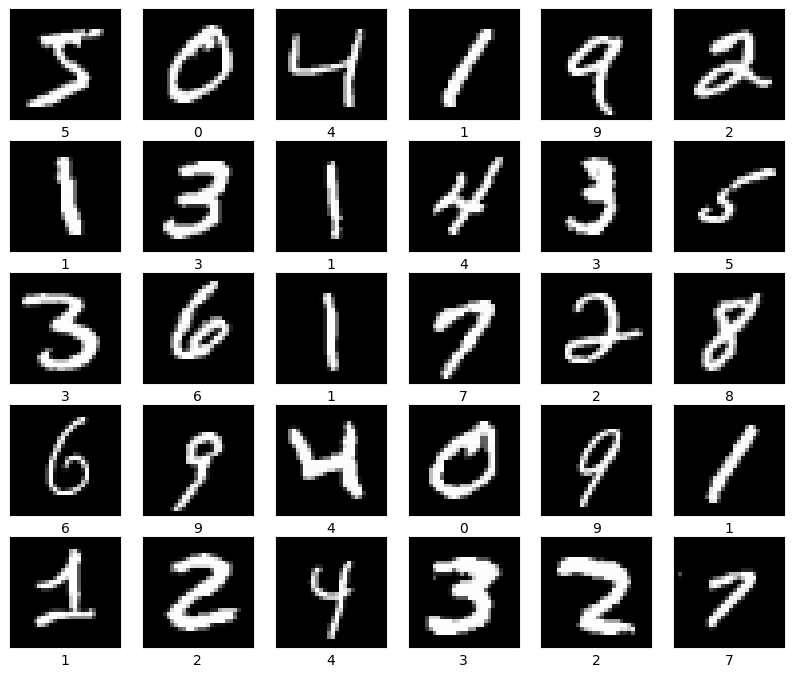

In [3]:
# Let's see how our data looks like
plt.figure(figsize=(10, 10))

for i in range(30):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = 'grey')
    plt.xlabel(y_train[i])
plt.show()

In [4]:
# Let's explore the dataset
X_train.shape, y_train.shape, X_test.shape, y_test.shape

print(f"We have {len(X_train)} training images and {len(X_test)} testing images in the dataset.")
print(f"The shape of our dataset is {X_train[1].shape}")

We have 60000 training images and 10000 testing images in the dataset.
The shape of our dataset is (28, 28)


Text(0.5, 0, '8')

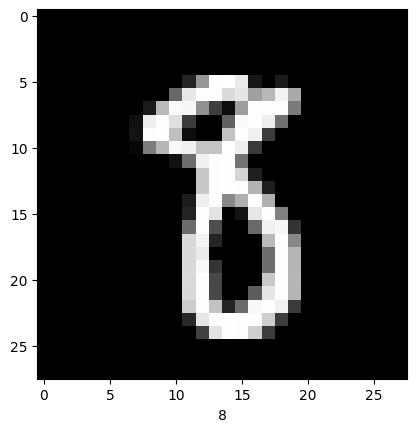

In [5]:
# Let's see a random picture from the dataset
plt.imshow(X_train[45673], cmap = 'grey')
plt.xlabel(y_train[45673])

In [6]:
# Let's see this picture in matrix form
print("Pixel values: \n")
for row in X_train[45673]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

Pixel values: 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  37 150 254 255 234  23   0  27   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 103 231 253 253 218 229 160 184 242 169   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0  27 186 250 247 145  62  13 158 253 253 253 123   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0  15 238 254 223  59   0   0  97 249 253 238 112   0 

In [7]:
# Let's normalize this data and convert it into float32 dtype
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [8]:
# Let's see the values of each pixel in the image after normalization
print("Pixel values after normalization: \n")
for row in X_train[45673]:
    for pixel in row:
        print("{:0.3}".format(pixel), end=" ")
    print()

Pixel values after normalization: 

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.145 0.588 0.996 1.0 0.918 0.0902 0.0 0.106 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.404 0.906 0.992 0.992 0.855 0.898 0.627 0.722 0.949 0.663 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.106 0.729 0.98 0.969 0.569 0.243 0.051 0.62 0.992 0.992 0.992 0.482 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0

In [9]:
# Let's reshape the images to have a channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [10]:
# Let's see now the shape of dataset
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
# Build the model

model = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)), # 28x28 pixels with 1 color channel

    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # Convolutional layer
    # Filter is the number of filters we want to apply
    # Kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # Convolutional layer
    layers.MaxPooling2D(), # Pooling layer

    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # Convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # Convolutional layer
    layers.MaxPooling2D(), # Pooling layer
    
    layers.Flatten(), # Flatten layer

    layers.Dense(10, activation='softmax') # Output layer 10 because we have values from 0 to 9
])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7371 - loss: 0.7811 - val_accuracy: 0.9607 - val_loss: 0.1322
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9612 - loss: 0.1352 - val_accuracy: 0.9729 - val_loss: 0.0933
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9715 - loss: 0.0972 - val_accuracy: 0.9735 - val_loss: 0.0857
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9778 - loss: 0.0736 - val_accuracy: 0.9757 - val_loss: 0.0773
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9805 - loss: 0.0648 - val_accuracy: 0.9813 - val_loss: 0.0645


In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9808 - loss: 0.0631
Test Loss: 0.05387706309556961
Test Accuracy: 0.9833999872207642


In [22]:
# Save the model to be used later
model.save('models/cnn_mnist_model.h5')

In [28]:
# Let's grab an image
img = X_test[0]
print(img.shape)

(28, 28, 1)


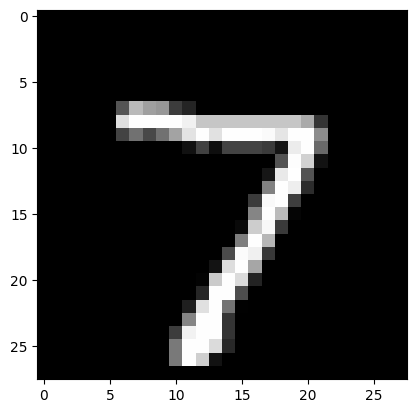

In [30]:
# Let's plot this image
plt.imshow(img, cmap="gray")
plt.grid(False)
plt.show()

In [34]:
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[2.0060174e-06 2.2021291e-08 1.9300140e-05 9.4628158e-05 6.4753328e-11
  3.2071682e-07 3.4458662e-14 9.9987400e-01 5.0330527e-06 4.6345826e-06]]


In [35]:
np.argmax(predictions)

7

In [38]:
print(f"The model predicts that this image is a number {np.argmax(predictions)}.")

The model predicts that this image is a number 7.
